In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from dgp_aepmcm.gp_network import DGPNetwork
np.random.seed(5)

In [2]:
# Generate training data
colors = ['#1b9e77','#d95f02','#7570b3']
@np.vectorize
def f_step(x):
    if x > 0.0:
        return 1.0 + 0.05 * np.random.normal()
    else:
        return 0.05 * np.random.normal()

@np.vectorize
def f_step_no_noise(x):
    if x > 0.0:
        return 1.0
    else:
        return 0.0

N = 1000    
x_train = np.random.uniform(-1, 1, int(0.9 * N))[:, None]
y_train = f_step(x_train)

x_test = np.linspace(-1, 1, 300)[:, None]
y_test = f_step(x_test)

# Normalize
x_train_mean = np.mean(x_train, 0)[None, :]
x_train_std = np.std(x_train, 0)[None, :] + 1e-6  # added jitter in case it's 0

x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

y_train_mean = np.mean(y_train, 0)[None, :]
y_train_std = np.std(y_train, 0)[None, :]

y_train = (y_train - y_train_mean) / y_train_std

In [3]:
# DGP model variables
# Number of inducing points
M = 50
D = x_train.shape[-1]
# Maximun of epochs for training
max_epochs = 1000
learning_rate = 0.01
minibatch_size = 50
n_samples_each_point = 10
n_samples = 20

In [4]:
# Instantiate and train DGP-AEPMCM. with L=3 and 3 GP nodes for the first two layers
# Inducing points locations
Z = kmeans2(x_train, M, minit='points')[0]
model = DGPNetwork(
    x_train,
    y_train,
    inducing_points=Z,
    minibatch_size=minibatch_size,
    show_debug_info=True)

model.add_input_layer()
# This method always assume a mean function for the prior p(u) = N(u| m(x), Kzz)
# with m(x) = X W
# For this example we disable the mean function for the prior so we set W to 0.
model.add_gp_layer(M, 3, W=np.zeros((D, 3)))
model.add_noise_layer()
model.add_gp_layer(M, 3, W=np.zeros((3, 3)))
model.add_noise_layer()
model.add_gp_layer(M, 1, W=np.zeros((3, 1)))
model.add_noise_layer()
model.add_output_layer_regression()

model.train_via_adam(
    max_epochs=max_epochs,    
    learning_rate=learning_rate)


Creating DGP network for regression problem
Instructions for updating:
Colocations handled automatically by placer.
Compiling adam updates
Initializing network
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Use tf.random.categorical instead.
Training for 1000 epoc

Epoch: 68  | Energy: -0.685088   | Time:   0.7631s | Memory: 0.56 GB | ETA: 10min, 29s
Epoch: 69  | Energy: -0.664798   | Time:   0.7414s | Memory: 0.56 GB | ETA: 10min, 34s
Epoch: 70  | Energy: -0.684818   | Time:   0.7115s | Memory: 0.56 GB | ETA: 10min, 39s
Epoch: 71  | Energy: -0.696234   | Time:   0.7951s | Memory: 0.56 GB | ETA: 10min, 44s
Epoch: 72  | Energy: -0.718138   | Time:   0.6942s | Memory: 0.56 GB | ETA: 10min, 51s
Epoch: 73  | Energy: -0.665415   | Time:   0.7161s | Memory: 0.56 GB | ETA: 11min, 1s
Epoch: 74  | Energy: -0.694436   | Time:   0.7910s | Memory: 0.56 GB | ETA: 11min, 14s
Epoch: 75  | Energy: -0.692042   | Time:   0.7829s | Memory: 0.56 GB | ETA: 11min, 24s
Epoch: 76  | Energy: -0.698848   | Time:   0.6461s | Memory: 0.56 GB | ETA: 11min, 26s
Epoch: 77  | Energy: -0.713050   | Time:   0.7505s | Memory: 0.56 GB | ETA: 11min, 28s
Epoch: 78  | Energy: -0.642778   | Time:   0.6908s | Memory: 0.56 GB | ETA: 11min, 31s
Epoch: 79  | Energy: -0.699433   | Time:   0

Epoch: 164 | Energy: -0.772832   | Time:   0.4756s | Memory: 0.56 GB | ETA: 6min, 56s
Epoch: 165 | Energy: -0.751633   | Time:   0.4973s | Memory: 0.56 GB | ETA: 6min, 55s
Epoch: 166 | Energy: -0.780859   | Time:   0.4690s | Memory: 0.56 GB | ETA: 6min, 54s
Epoch: 167 | Energy: -0.786653   | Time:   0.4615s | Memory: 0.56 GB | ETA: 6min, 52s
Epoch: 168 | Energy: -0.756034   | Time:   0.4765s | Memory: 0.56 GB | ETA: 6min, 44s
Epoch: 169 | Energy: -0.764847   | Time:   0.4733s | Memory: 0.56 GB | ETA: 6min, 40s
Epoch: 170 | Energy: -0.780111   | Time:   0.4568s | Memory: 0.56 GB | ETA: 6min, 36s
Epoch: 171 | Energy: -0.763326   | Time:   0.4732s | Memory: 0.56 GB | ETA: 6min, 35s
Epoch: 172 | Energy: -0.783118   | Time:   0.4683s | Memory: 0.56 GB | ETA: 6min, 32s
Epoch: 173 | Energy: -0.794809   | Time:   0.4728s | Memory: 0.56 GB | ETA: 6min, 30s
Epoch: 174 | Energy: -0.776060   | Time:   0.4553s | Memory: 0.56 GB | ETA: 6min, 27s
Epoch: 175 | Energy: -0.780430   | Time:   0.4648s | M

Epoch: 260 | Energy: -0.795725   | Time:   0.5524s | Memory: 0.56 GB | ETA: 9min, 29s
Epoch: 261 | Energy: -0.790706   | Time:   0.4877s | Memory: 0.56 GB | ETA: 9min, 14s
Epoch: 262 | Energy: -0.794055   | Time:   0.4937s | Memory: 0.56 GB | ETA: 8min, 60s
Epoch: 263 | Energy: -0.753335   | Time:   0.5105s | Memory: 0.56 GB | ETA: 8min, 42s
Epoch: 264 | Energy: -0.772681   | Time:   0.8343s | Memory: 0.56 GB | ETA: 8min, 48s
Epoch: 265 | Energy: -0.781600   | Time:   0.5262s | Memory: 0.56 GB | ETA: 8min, 45s
Epoch: 266 | Energy: -0.788557   | Time:   0.5813s | Memory: 0.56 GB | ETA: 8min, 44s
Epoch: 267 | Energy: -0.805090   | Time:   0.5440s | Memory: 0.56 GB | ETA: 8min, 39s
Epoch: 268 | Energy: -0.794962   | Time:   0.4922s | Memory: 0.56 GB | ETA: 8min, 26s
Epoch: 269 | Energy: -0.783195   | Time:   0.5153s | Memory: 0.56 GB | ETA: 8min, 13s
Epoch: 270 | Energy: -0.798573   | Time:   0.7518s | Memory: 0.56 GB | ETA: 8min, 4s
Epoch: 271 | Energy: -0.802783   | Time:   0.8689s | Me

Epoch: 356 | Energy: -0.800437   | Time:   0.5999s | Memory: 0.57 GB | ETA: 6min, 14s
Epoch: 357 | Energy: -0.788946   | Time:   0.4909s | Memory: 0.57 GB | ETA: 6min, 8s
Epoch: 358 | Energy: -0.747353   | Time:   0.4687s | Memory: 0.57 GB | ETA: 6min, 4s
Epoch: 359 | Energy: -0.760188   | Time:   0.4669s | Memory: 0.57 GB | ETA: 5min, 56s
Epoch: 360 | Energy: -0.759502   | Time:   0.7067s | Memory: 0.57 GB | ETA: 6min, 1s
Epoch: 361 | Energy: -0.793205   | Time:   0.5041s | Memory: 0.57 GB | ETA: 6min, 1s
Epoch: 362 | Energy: -0.788369   | Time:   0.4527s | Memory: 0.57 GB | ETA: 5min, 56s
Epoch: 363 | Energy: -0.781095   | Time:   0.4781s | Memory: 0.57 GB | ETA: 5min, 55s
Epoch: 364 | Energy: -0.797142   | Time:   0.5731s | Memory: 0.57 GB | ETA: 5min, 52s
Epoch: 365 | Energy: -0.787628   | Time:   0.5094s | Memory: 0.57 GB | ETA: 5min, 51s
Epoch: 366 | Energy: -0.796871   | Time:   0.4633s | Memory: 0.57 GB | ETA: 5min, 48s
Epoch: 367 | Energy: -0.786466   | Time:   0.5528s | Memor

Epoch: 452 | Energy: -0.781964   | Time:   0.6722s | Memory: 0.57 GB | ETA: 6min, 12s
Epoch: 453 | Energy: -0.784455   | Time:   0.7575s | Memory: 0.57 GB | ETA: 6min, 11s
Epoch: 454 | Energy: -0.771764   | Time:   0.6293s | Memory: 0.57 GB | ETA: 6min, 3s
Epoch: 455 | Energy: -0.797004   | Time:   0.6345s | Memory: 0.57 GB | ETA: 5min, 57s
Epoch: 456 | Energy: -0.780598   | Time:   0.5780s | Memory: 0.57 GB | ETA: 5min, 52s
Epoch: 457 | Energy: -0.796207   | Time:   0.4566s | Memory: 0.57 GB | ETA: 5min, 41s
Epoch: 458 | Energy: -0.799523   | Time:   0.4654s | Memory: 0.57 GB | ETA: 5min, 34s
Epoch: 459 | Energy: -0.793691   | Time:   0.4519s | Memory: 0.57 GB | ETA: 5min, 26s
Epoch: 460 | Energy: -0.788704   | Time:   0.5964s | Memory: 0.57 GB | ETA: 5min, 16s
Epoch: 461 | Energy: -0.783899   | Time:   0.5344s | Memory: 0.57 GB | ETA: 5min, 13s
Epoch: 462 | Energy: -0.773869   | Time:   0.6188s | Memory: 0.57 GB | ETA: 5min, 16s
Epoch: 463 | Energy: -0.786097   | Time:   0.4755s | Me

Epoch: 548 | Energy: -0.794144   | Time:   0.5839s | Memory: 0.57 GB | ETA: 4min, 1s
Epoch: 549 | Energy: -0.789372   | Time:   0.4495s | Memory: 0.57 GB | ETA: 3min, 58s
Epoch: 550 | Energy: -0.771285   | Time:   0.6159s | Memory: 0.57 GB | ETA: 3min, 59s
Epoch: 551 | Energy: -0.780236   | Time:   0.5569s | Memory: 0.57 GB | ETA: 3min, 59s
Epoch: 552 | Energy: -0.788622   | Time:   0.4966s | Memory: 0.57 GB | ETA: 3min, 56s
Epoch: 553 | Energy: -0.773191   | Time:   0.5123s | Memory: 0.57 GB | ETA: 3min, 52s
Epoch: 554 | Energy: -0.758923   | Time:   0.4703s | Memory: 0.57 GB | ETA: 3min, 50s
Epoch: 555 | Energy: -0.756714   | Time:   0.4594s | Memory: 0.57 GB | ETA: 3min, 48s
Epoch: 556 | Energy: -0.794957   | Time:   0.4645s | Memory: 0.57 GB | ETA: 3min, 47s
Epoch: 557 | Energy: -0.810032   | Time:   0.4525s | Memory: 0.57 GB | ETA: 3min, 47s
Epoch: 558 | Energy: -0.805639   | Time:   0.4985s | Memory: 0.57 GB | ETA: 3min, 47s
Epoch: 559 | Energy: -0.814585   | Time:   0.4957s | Me

Epoch: 644 | Energy: -0.792305   | Time:   0.5346s | Memory: 0.57 GB | ETA: 3min, 7s
Epoch: 645 | Energy: -0.783039   | Time:   0.4760s | Memory: 0.57 GB | ETA: 3min, 6s
Epoch: 646 | Energy: -0.792314   | Time:   0.4934s | Memory: 0.57 GB | ETA: 3min, 6s
Epoch: 647 | Energy: -0.764616   | Time:   0.5027s | Memory: 0.57 GB | ETA: 3min, 6s
Epoch: 648 | Energy: -0.780624   | Time:   0.4975s | Memory: 0.57 GB | ETA: 3min, 5s
Epoch: 649 | Energy: -0.785781   | Time:   0.4765s | Memory: 0.57 GB | ETA: 3min, 4s
Epoch: 650 | Energy: -0.781591   | Time:   0.5611s | Memory: 0.57 GB | ETA: 3min, 5s
Epoch: 651 | Energy: -0.719406   | Time:   0.5078s | Memory: 0.57 GB | ETA: 3min, 5s
Epoch: 652 | Energy: -0.749546   | Time:   0.4601s | Memory: 0.57 GB | ETA: 3min, 4s
Epoch: 653 | Energy: -0.790343   | Time:   0.4714s | Memory: 0.57 GB | ETA: 3min, 3s
Epoch: 654 | Energy: -0.791738   | Time:   0.4543s | Memory: 0.57 GB | ETA: 3min, 1s
Epoch: 655 | Energy: -0.794050   | Time:   0.4708s | Memory: 0.57

Epoch: 740 | Energy: -0.760893   | Time:   0.4601s | Memory: 0.57 GB | ETA: 2min, 48s
Epoch: 741 | Energy: -0.799442   | Time:   0.4721s | Memory: 0.57 GB | ETA: 2min, 47s
Epoch: 742 | Energy: -0.778660   | Time:   0.5335s | Memory: 0.57 GB | ETA: 2min, 46s
Epoch: 743 | Energy: -0.778619   | Time:   0.5133s | Memory: 0.57 GB | ETA: 2min, 44s
Epoch: 744 | Energy: -0.771169   | Time:   0.4913s | Memory: 0.57 GB | ETA: 2min, 40s
Epoch: 745 | Energy: -0.789671   | Time:   0.5520s | Memory: 0.57 GB | ETA: 2min, 38s
Epoch: 746 | Energy: -0.778616   | Time:   0.7625s | Memory: 0.57 GB | ETA: 2min, 38s
Epoch: 747 | Energy: -0.790134   | Time:   0.7908s | Memory: 0.57 GB | ETA: 2min, 38s
Epoch: 748 | Energy: -0.786799   | Time:   0.8720s | Memory: 0.57 GB | ETA: 2min, 40s
Epoch: 749 | Energy: -0.792512   | Time:   0.5421s | Memory: 0.57 GB | ETA: 2min, 40s
Epoch: 750 | Energy: -0.798223   | Time:   0.4955s | Memory: 0.57 GB | ETA: 2min, 38s
Epoch: 751 | Energy: -0.776602   | Time:   0.5924s | M

Epoch: 836 | Energy: -0.801535   | Time:   0.4657s | Memory: 0.57 GB | ETA: 1min, 20s
Epoch: 837 | Energy: -0.787545   | Time:   0.4678s | Memory: 0.57 GB | ETA: 1min, 18s
Epoch: 838 | Energy: -0.795019   | Time:   0.4788s | Memory: 0.57 GB | ETA: 1min, 17s
Epoch: 839 | Energy: -0.792274   | Time:   0.4648s | Memory: 0.57 GB | ETA: 1min, 16s
Epoch: 840 | Energy: -0.798417   | Time:   0.4597s | Memory: 0.57 GB | ETA: 1min, 16s
Epoch: 841 | Energy: -0.804688   | Time:   0.4598s | Memory: 0.57 GB | ETA: 1min, 15s
Epoch: 842 | Energy: -0.792985   | Time:   0.6054s | Memory: 0.57 GB | ETA: 1min, 16s
Epoch: 843 | Energy: -0.786419   | Time:   0.5526s | Memory: 0.57 GB | ETA: 1min, 15s
Epoch: 844 | Energy: -0.794165   | Time:   0.5190s | Memory: 0.57 GB | ETA: 1min, 15s
Epoch: 845 | Energy: -0.801099   | Time:   0.4703s | Memory: 0.57 GB | ETA: 1min, 14s
Epoch: 846 | Energy: -0.790929   | Time:   0.4875s | Memory: 0.57 GB | ETA: 1min, 14s
Epoch: 847 | Energy: -0.801941   | Time:   0.6110s | M

Epoch: 934 | Energy: -0.788062   | Time:   0.4833s | Memory: 0.57 GB | ETA: 33s
Epoch: 935 | Energy: -0.760421   | Time:   0.4933s | Memory: 0.57 GB | ETA: 32s
Epoch: 936 | Energy: -0.773264   | Time:   0.4806s | Memory: 0.57 GB | ETA: 31s
Epoch: 937 | Energy: -0.782682   | Time:   0.4757s | Memory: 0.57 GB | ETA: 31s
Epoch: 938 | Energy: -0.787147   | Time:   0.4972s | Memory: 0.57 GB | ETA: 30s
Epoch: 939 | Energy: -0.789711   | Time:   0.4872s | Memory: 0.57 GB | ETA: 30s
Epoch: 940 | Energy: -0.792234   | Time:   0.4942s | Memory: 0.57 GB | ETA: 29s
Epoch: 941 | Energy: -0.797848   | Time:   0.4767s | Memory: 0.57 GB | ETA: 29s
Epoch: 942 | Energy: -0.797853   | Time:   0.4884s | Memory: 0.57 GB | ETA: 28s
Epoch: 943 | Energy: -0.802842   | Time:   0.4889s | Memory: 0.57 GB | ETA: 28s
Epoch: 944 | Energy: -0.800769   | Time:   0.5118s | Memory: 0.57 GB | ETA: 27s
Epoch: 945 | Energy: -0.805191   | Time:   0.5076s | Memory: 0.57 GB | ETA: 27s
Epoch: 946 | Energy: -0.805866   | Time:

In [5]:
# Calculate Test Log Likelihood and RMSE
ll, rmse = model.calculate_loglikehood_rmse(x_test, y_test, y_train_mean, y_train_std)
print(f"Test Log-Likelihood: {ll}.\nRMSE {rmse}")

Test Log-Likelihood: 1.5677227973937988.
RMSE 0.06418315382388737


In [6]:
# Calculate predictions
y_pred, y_uncert = model.predict(x_test)

Predicting batch 1/6
Predicting batch 2/6
Predicting batch 3/6
Predicting batch 4/6
Predicting batch 5/6
Predicting batch 6/6


In [7]:
# Denormalize (for plotting purposes)
x_train = x_train * x_train_std + x_train_mean
y_train = y_train * y_train_std + y_train_mean

x_test = x_test * x_train_std + x_train_mean
y_pred = y_pred * y_train_std + y_train_mean

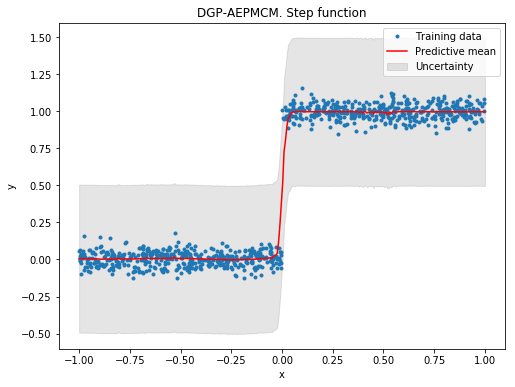

In [8]:
# Plot our results
plt.figure(1, figsize=(8, 6))
plt.plot(x_train, y_train, '.', label='Training data')
plt.plot(x_test, y_pred, 'r', label='Predictive mean')
plt.fill_between(x_test[:, 0],
                 (y_pred - y_train_std)[:, 0], (y_pred + y_train_std)[:, 0],
                 alpha=0.1, color='k', label='Uncertainty')
plt.title('DGP-AEPMCM. Step function')
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

In [9]:
# Plottings samples from the predictive distribution shows that the method can model
# multimodal data.
N_linspace_samples = 1000
samples_x = np.tile(np.linspace(-2, 2, N_linspace_samples)[:,None], [n_samples_each_point, 1])
samples_y = model.sample_from_predictive_distribution((samples_x - x_train_mean) / x_train_std)
# Denormalize
samples_y = samples_y * y_train_std + y_train_mean

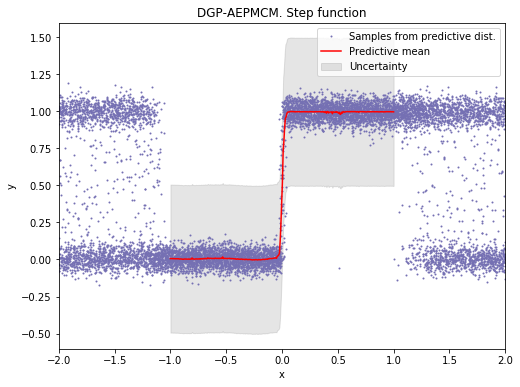

In [10]:
plt.figure(2, figsize=(8, 6))
plt.plot(samples_x, samples_y, '.', markersize=2, color=colors[2], label='Samples from predictive dist.')
plt.plot(x_test, y_pred, 'r', label='Predictive mean')
plt.fill_between(x_test[:, 0],
                 (y_pred - y_train_std)[:, 0], (y_pred + y_train_std)[:, 0],
                 alpha=0.1, color='k', label='Uncertainty')
plt.xlim(-2, 2)
plt.title('DGP-AEPMCM. Step function')
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

In [11]:
# We can also plot the probabilites for each y value given a fixed x.
# This will also show the multimodality
x1 = -2.
x2 = 2.
y_values = np.linspace(-3, 3, 500)[:,None]
y_probs_x1 = model.get_predictive_distribution_for_x(np.array([x1])[:, None], y_values)
y_probs_x2 = model.get_predictive_distribution_for_x(np.array([x2])[:, None], y_values)

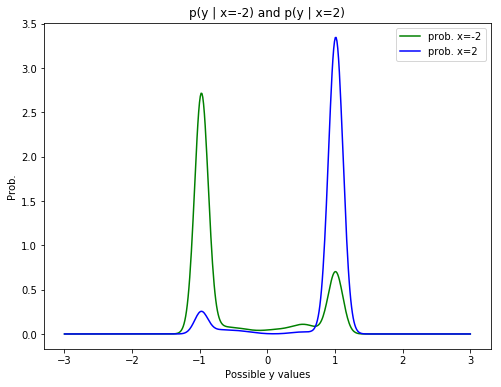

In [14]:
# Plot the probability of each y value for a fixed x=-2. p(y | x)
plt.figure(3, figsize=(8, 6))
plt.plot(y_values[:, 0], y_probs_x1[:, 0], 'g', label='prob. x=-2')
plt.plot(y_values[:, 0], y_probs_x2[:, 0], 'b', label='prob. x=2')
plt.title("p(y | x=-2) and p(y | x=2)")
plt.ylabel("Prob.")
plt.xlabel("Possible y values")
plt.legend()
plt.show()